<a href="https://colab.research.google.com/github/WojciechWielgus/DeepLearning/blob/master/MNIST_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Multilayer Perceptron

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

### Loading data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


###Eksploracja danych

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print('Liczba danych treningowych', X_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
Liczba danych treningowych 60000


(-0.5, 27.5, 27.5, -0.5)

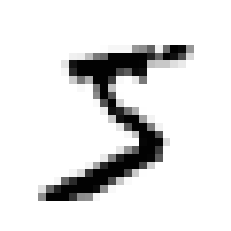

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.axis('off')

### Wyświetlenie kilku obrazków

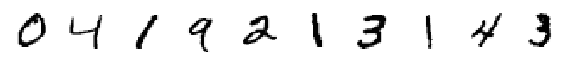

In [12]:
plt.figure(figsize=(10,10))
for i in range(1,11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i], cmap='Greys')
plt.show()

###Etykiety

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### Przygotowanie Danych

In [0]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255
X_test = X_test / 255

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [21]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Budowa Modelu


In [22]:
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(28*28,)))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

### Trenowanie modelu

In [24]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 8s 129us/step - loss: 0.2195 - acc: 0.9323 - val_loss: 0.1012 - val_acc: 0.9665
Epoch 2/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0834 - acc: 0.9738 - val_loss: 0.0847 - val_acc: 0.9732
Epoch 3/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0550 - acc: 0.9828 - val_loss: 0.0777 - val_acc: 0.9780
Epoch 4/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0419 - acc: 0.9878 - val_loss: 0.0787 - val_acc: 0.9793
Epoch 5/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0304 - acc: 0.9906 - val_loss: 0.1014 - val_acc: 0.9768
Epoch 6/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0241 - acc: 0.9926 - val_loss: 0.0804 - val_acc: 0.9813
Epoch 7/20
60000/600

In [26]:
history.history

{'acc': [0.9323,
  0.9737666666348775,
  0.9828166666984558,
  0.9878166666984558,
  0.9905500000317892,
  0.9926166666666667,
  0.9938166666666667,
  0.9945166666348775,
  0.9958666666348776,
  0.99635,
  0.9966166666666667,
  0.9966,
  0.9973333333333333,
  0.9976666666348776,
  0.9979,
  0.9978333333015442,
  0.9983166666666666,
  0.9984833333333333,
  0.9984,
  0.99855],
 'loss': [0.21953367554744085,
  0.08339450894097487,
  0.0549530329224964,
  0.04194569953431686,
  0.030357891877430182,
  0.024063151951289424,
  0.020305849059391767,
  0.018415974520664895,
  0.014850463217679256,
  0.012877607114009152,
  0.011763381809309552,
  0.011353678616246423,
  0.008634238901295976,
  0.00885988744126383,
  0.007686411422292228,
  0.007703445691557408,
  0.006985432797233322,
  0.006478651451642964,
  0.006056116723447091,
  0.005007801916413367],
 'val_acc': [0.9665,
  0.9732,
  0.978,
  0.9793,
  0.9768,
  0.9813,
  0.9805,
  0.9795,
  0.9805,
  0.9816,
  0.9828,
  0.9836,
  0.9795,